## Atmospheric global mean biases for nextGEMS cycle 2 data

In [3]:
from aqua import Reader, catalogue, inspect_catalogue
import os
import sys
%env PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_directory)

from atm_global_mean import AGM_diag

env: PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/:/home/b/b382257/.conda/envs/aqua/bin/:/home/b/b382257/.conda/envs/aqua/bin/


In [4]:
cat = catalogue()
inspect_catalogue(cat)

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-monthly	LRA data monthly at r100
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y
IFS	tco25

['IFS',
 'FESOM',
 'ICON',
 'MSWEP',
 'ERA5',
 'CERES',
 'AVISO',
 'PHC3',
 'WOA18',
 'OSI-SAF']

In [5]:
plotdir = './plots/AtmGlobalBiases/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

### Working with nextGEMS Cycle 2 data:

In [6]:
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve(fix=True)

reader_tco2559 = Reader(model = 'IFS', exp = 'tco2559-ng5', source = 'lra-r100-monthly')
data_tco2559 = reader_tco2559.retrieve(fix=True)

reader_icon = Reader(model = 'ICON', exp = 'ngc2009', source = 'lra-r100-monthly')
data_icon = reader_icon.retrieve(fix=True)

reader_tco1279 = Reader(model = 'IFS', exp = 'tco1279-orca025', source = 'lra-r100-monthly')
data_tco1279 = reader_icon.retrieve(fix=True)

reader_fesom = Reader(model = 'FESOM', exp = 'tco2559-ng5', source = 'lra-r100-monthly')
data_fesom = reader_tco2559.retrieve(fix=True)

In [7]:
data_era5.attrs['name'] = 'data_era5'
data_tco2559.attrs['name'] = 'data_tco2559'

NameError: name 'plotdir' is not defined

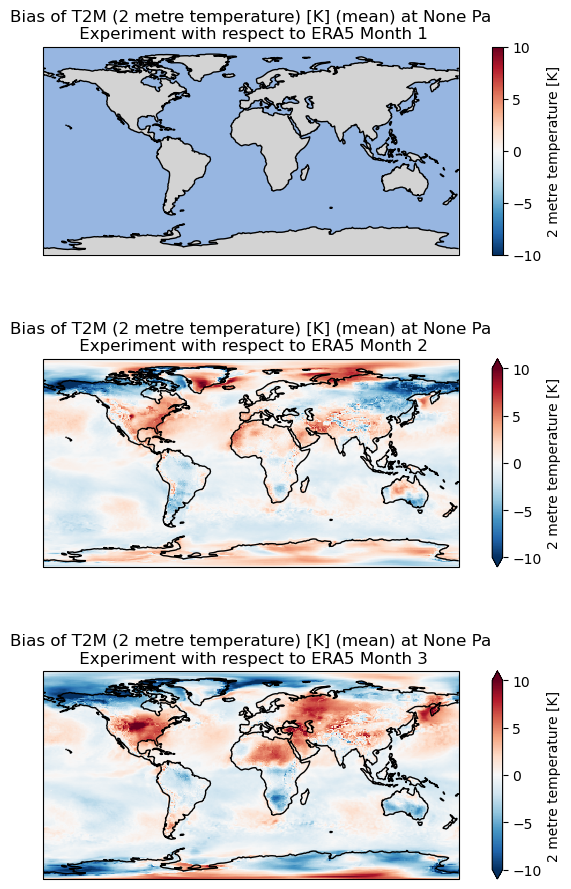

In [10]:
# Call function for Temperature Biases; use like:
result, bias_map =  AGM_diag.compare_datasets(data_tco2559, data_era5, '2t', 'T2M', slice('2020-01-01', '2020-03-01'), plev = None, statistic = 'mean')

Now we are plotting some vertical biases along the latitude:

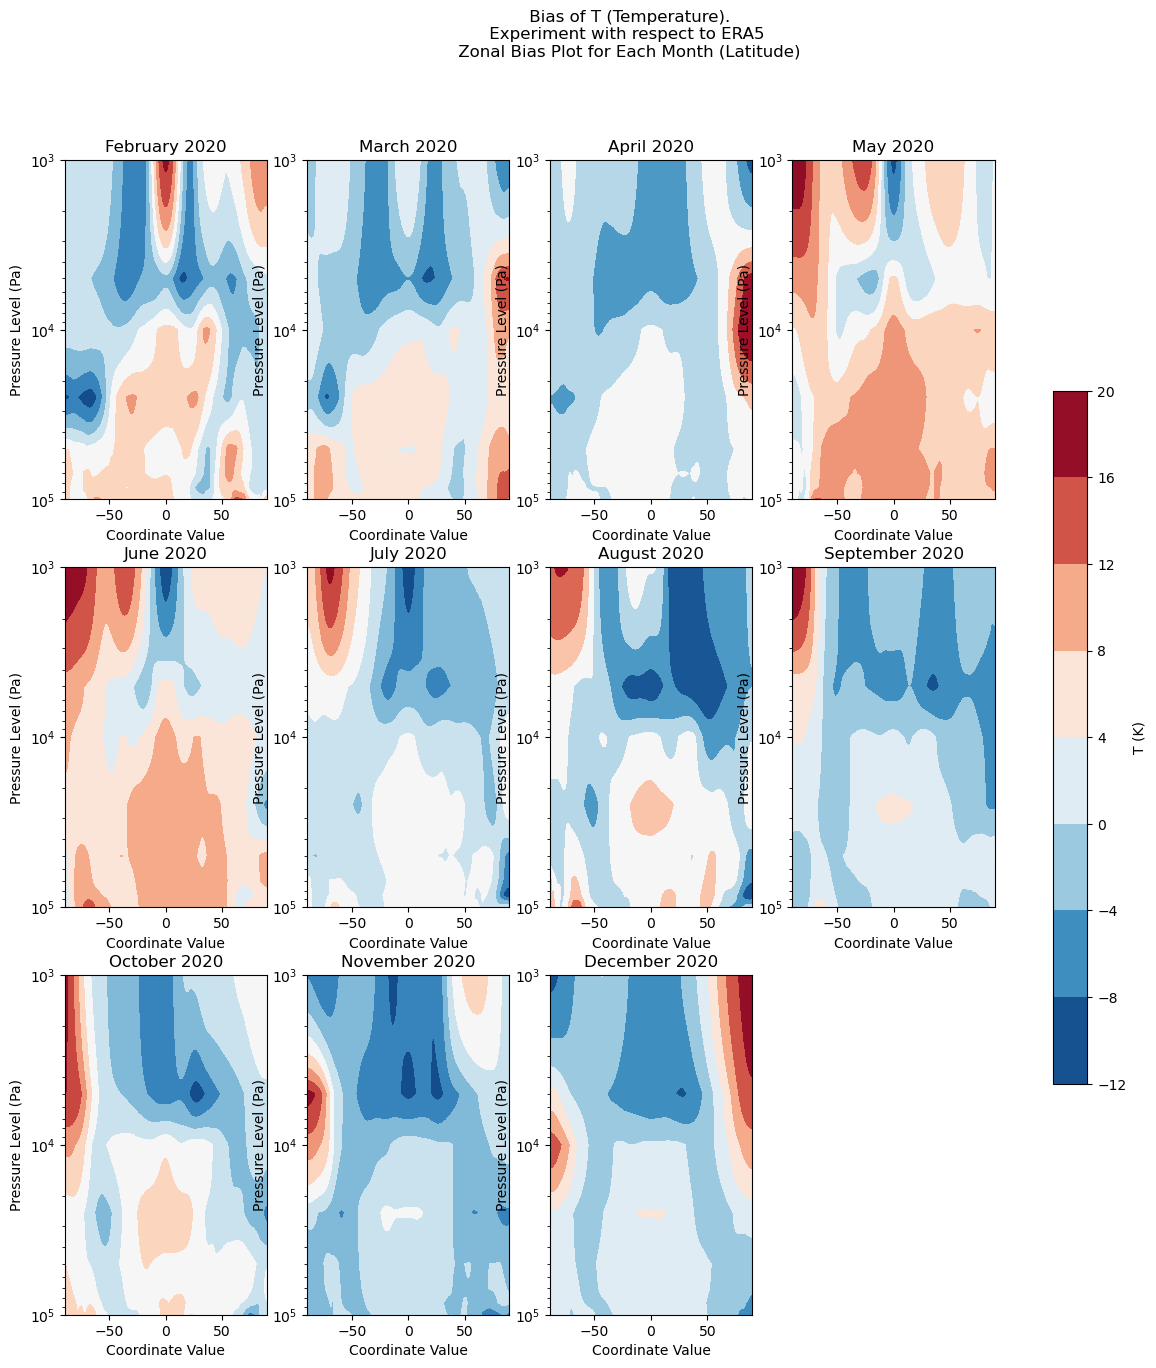

TypeError: cannot unpack non-iterable NoneType object

In [9]:
result, bias_map = AGM_diag.compare_datasets_plev(data_tco2559, data_era5, 't', 'T', slice('2020-01-01', '2020-12-01'), plot_latitude=True)